# Pandas

In [13]:
import numpy as np
import pandas as pd

#supaya notebook tidak di hide bagian tengahnya, tidak disarankan untuk jumlah kolom yg banyak
pd.set_option("display.max.columns", None)

#supaya comma hanya 2 angka di belakang comma
pd.set_option("display.precision", 2)

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/nbaallelo.csv')

In [74]:
df_nba = df

In [14]:
len(df)

126314

In [15]:
df.shape

(126314, 23)

## informasi tentang data 

data ini merangkum data turnamen basket di USA tahun 1945 - 2015

ada 23 kolom :

1. gameOrder : karena setiap pertandingan akan tertulis 2x pada dataset, memudahkan mencari pasangan pertandingan yg sama. gameOrder 1 , dengan game id yg sama "194611010TRH" adalah game yg sama TRH	Huskies VS NYK	Knicks

2. game_id : unique id, per pertandingan

3. lg_id : liga mana, ada NBA , ada ABA

...

In [16]:
df.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [17]:
df['lg_id'].unique()

array(['NBA', 'ABA'], dtype=object)

- pandas import data csv pakai .read_csv()

- .shape(), .head(), .tail()

- .loc() & .iloc() untuk mengambil data baris tertentu

- pakai indexing & slicing untuk mengambil data kolom tertentu

- .unique() untuk melihat dalam 1 kolom data yg unik apa aja

- .value_counts() untuk setiap data unik, muncul berapa kali ?

- .describe() : untuk melihat angka statistik data numerik, per kolom 

In [12]:
df.tail()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN
126313,63157,201506170CLE,NBA,1,2015,6/16/2015,103,1,GSW,Warriors,105,1813.63,1822.29,68.52,CLE,Cavaliers,97,1700.74,1692.09,A,W,0.52,NaN


In [21]:
#harus 1 dimensi untuk pakai unique()
nama_franchise = list(df['fran_id'].unique())
len(nama_franchise)

53

In [18]:
df[['fran_id']]

,fran_id
0,Huskies
1,Knicks
2,Stags
3,Knicks
4,Falcons
...,...
126309,Cavaliers
126310,Warriors
126311,Cavaliers
126312,Cavaliers


In [23]:
#ada berapa value NBA & ABA pada dataset

df['lg_id'].value_counts()

lg_id
NBA    118016
ABA      8298
Name: count, dtype: int64

In [25]:
df['pts'].describe()

count    126314.00
mean        102.73
std          14.81
min           0.00
25%          93.00
50%         103.00
75%         112.00
max         186.00
Name: pts, dtype: float64

## Pandas Data Structure

### Series

CRUD

- create : membuat series
- read, update, delete

In [27]:
stok = pd.Series([50,78,98])
print(stok)
print(type(stok))


0    50
1    78
2    98
dtype: int64
<class 'pandas.core.series.Series'>


In [29]:
#mirip denan list / numpy array 1 dimensi

stok = pd.Series({
    "apel" : 50,
    "jeruk" : 78,
    "pisang" : 98
})
print(stok)

apel      50
jeruk     78
pisang    98
dtype: int64


In [30]:
stok.keys()

Index(['apel', 'jeruk', 'pisang'], dtype='object')

In [32]:
stok.index

Index(['apel', 'jeruk', 'pisang'], dtype='object')

In [34]:
stok.values

array([50, 78, 98])

# DataFrame

dataframe bersifat 2 dimensi, 1 dataframe bisa punya banyak series

In [35]:
harga = pd.Series({
    "apel" : 5000,
    "jeruk" : 7500,
    "pisang" : 3000,
    "semangka" : 15000
})

In [37]:
df_buah = pd.DataFrame({
    "stok" : stok,
    "harga" : harga
})

df_buah

,stok,harga
apel,50.0,5000
jeruk,78.0,7500
pisang,98.0,3000
semangka,NaN,15000


In [52]:
#ubah nama kolom
df_buah2 = df_buah.rename(columns={
    "stok" : "Stock",
    "harga" : "Price"
})

In [53]:
#ubah nama index
df_buah2 = df_buah2.rename(index={
    "apel" : "Apple",
    "jeruk" : "Orange",
    "pisang" : "Banana",
    "semangka" : "Watermelon"
})

In [54]:
df_buah2

,Stock,Price
Apple,50.0,5000
Orange,78.0,7500
Banana,98.0,3000
Watermelon,NaN,15000


In [44]:
# punya shortcut untuk mendapatkan list index & list columns DataFrame

df_buah2.index

Index(['Apple', 'Orange', 'Banana', 'Watermelon'], dtype='object')

In [46]:
df_buah2.columns

Index(['stok', 'harga'], dtype='object')

In [56]:
df_buah

,stok,harga
apel,50.0,5000
jeruk,78.0,7500
pisang,98.0,3000
semangka,NaN,15000


In [60]:
#ambil dari nama
df_buah.loc['apel', 'stok']

50.0

In [59]:
#ambil dari posisi
df_buah.iloc[0, 0]

50.0

In [63]:
#ambil stok & harga apel & jeruk, balikin by DataFrame
df_buah.loc[['apel', 'jeruk'], ['stok', 'harga']]

,stok,harga
apel,50.0,5000
jeruk,78.0,7500


In [66]:
#balikin by Series
df_buah.loc[['apel', 'jeruk'], 'stok']

apel     50.0
jeruk    78.0
Name: stok, dtype: float64

# Querying your Dataset

In [69]:
#misal mau ambil buah yg > 3000 

#buat dulu kondisinya
kondisi = df_buah['harga'] > 3000

#gunakan kondisi sebagai index
df_buah[kondisi]

#ambil hanya nama buah saja
df_buah[kondisi].index

Index(['apel', 'jeruk', 'semangka'], dtype='object')

In [71]:
#kondisi berbentuk DataFrame value Bool

kondisi

apel         True
jeruk        True
pisang      False
semangka     True
Name: harga, dtype: bool

In [72]:
kondisi_harga = df_buah['harga'] > 3000
kondisi_stok = df_buah['stok'] > 50

df_buah[kondisi_harga & kondisi_stok]

,stok,harga
jeruk,78.0,7500


### review comparator

\== (sama dengan)

\>= atau <= lebih besar / lebih kecil sama dengan

\!= tidak sama dengan

\> atau < lebih besar / kecil


In [76]:
#kembali data ke NBA
#ambil game di tahun 2012

kondisi = df_nba['year_id'] == 2012
kondisi_fran = df_nba['fran_id'] == 'Lakers'

df_nba[kondisi & kondisi_fran]



,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
116282,58142,201112250LAL,NBA,0,2012,12/25/2011,1,0,LAL,Lakers,87,1594.38,1589.37,49.82,CHI,Bulls,88,1632.17,1637.18,H,L,0.59,NaN
116306,58154,201112260SAC,NBA,1,2012,12/26/2011,2,0,LAL,Lakers,91,1589.37,1577.88,48.67,SAC,Kings,100,1441.99,1453.48,A,L,0.57,NaN
116313,58157,201112270LAL,NBA,0,2012,12/27/2011,3,0,LAL,Lakers,96,1577.88,1584.81,49.37,UTA,Jazz,71,1451.30,1444.37,H,W,0.79,NaN
116344,58173,201112290LAL,NBA,0,2012,12/29/2011,4,0,LAL,Lakers,99,1584.81,1590.69,49.96,NYK,Knicks,82,1478.74,1472.85,H,W,0.77,NaN
116383,58192,201112310LAL,NBA,0,2012,12/31/2011,5,0,LAL,Lakers,92,1590.69,1594.84,50.37,DEN,Nuggets,89,1615.22,1611.07,H,W,0.61,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118353,59177,201205140OKC,NBA,1,2012,5/14/2012,74,1,LAL,Lakers,90,1587.44,1578.80,48.76,OKC,Thunder,119,1691.89,1700.53,A,L,0.24,NaN
118358,59180,201205160OKC,NBA,1,2012,5/16/2012,75,1,LAL,Lakers,75,1578.80,1577.01,48.58,OKC,Thunder,77,1700.53,1702.32,A,L,0.22,NaN
118367,59184,201205180LAL,NBA,0,2012,5/18/2012,76,1,LAL,Lakers,99,1577.01,1583.13,49.20,OKC,Thunder,96,1702.32,1696.19,H,W,0.46,NaN
118372,59187,201205190LAL,NBA,0,2012,5/19/2012,77,1,LAL,Lakers,100,1583.13,1577.80,48.66,OKC,Thunder,103,1696.19,1701.52,H,L,0.48,NaN


In [77]:
kondisi_pts = df_nba['pts'] < 10
df_nba[kondisi_pts]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,0,1460.34,1457.45,40.41,VIR,Squires,2,1484.19,1487.08,A,L,0.33,at Richmond VA; forfeit to VIR
26685,13343,197210260VIR,ABA,0,1973,10/26/1972,8,0,VIR,Squires,2,1484.19,1487.08,43.51,DNR,Nuggets,0,1460.34,1457.45,H,W,0.67,at Richmond VA; forfeit to VIR


dari konteks data, data ini aneh.

data yg aneh bisa di hapus / berikan notes / pisahkan keluar (handling missing & invalid values)

### Grouping & Aggregating Data

In [78]:
df_nba['pts'].mean()

102.72998242475101

In [79]:
df_nba['fran_id'].unique()

array(['Huskies', 'Knicks', 'Stags', 'Falcons', 'Capitols', 'Celtics',
       'Steamrollers', 'Ironmen', 'Bombers', 'Rebels', 'Warriors',
       'Baltimore', 'Jets', 'Pistons', 'Lakers', 'Kings', 'Hawks',
       'Denver', 'Olympians', 'Redskins', 'Waterloo', 'Packers', 'Sixers',
       'Wizards', 'Bulls', 'Thunder', 'Squires', 'Stars', 'Rockets',
       'Colonels', 'Pacers', 'Nuggets', 'Spurs', 'Spirits', 'Sounds',
       'Floridians', 'Nets', 'Condors', 'Bucks', 'Suns', 'Clippers',
       'Cavaliers', 'Trailblazers', 'Sails', 'Jazz', 'Mavericks',
       'Pelicans', 'Heat', 'Timberwolves', 'Magic', 'Grizzlies',
       'Raptors', 'Hornets'], dtype=object)

In [81]:
#ambil semua rata2 poin dari masing2 team
df_nba.groupby('fran_id')['pts'].mean()

fran_id
Baltimore        79.70
Bombers          71.46
Bucks           103.70
Bulls           101.53
Capitols         76.93
Cavaliers        99.85
Celtics         104.47
Clippers        101.93
Colonels        111.63
Condors         115.45
Denver           77.71
Falcons          63.28
Floridians      112.65
Grizzlies        95.16
Hawks           101.81
Heat             96.63
Hornets          94.51
Huskies          66.58
Ironmen          61.23
Jazz            102.15
Jets             74.70
Kings           103.97
Knicks          100.97
Lakers          105.82
Magic            99.43
Mavericks       102.63
Nets            101.76
Nuggets         108.20
Olympians        81.08
Pacers          103.69
Packers          86.01
Pelicans         97.96
Pistons         101.37
Raptors          96.92
Rebels           71.02
Redskins         82.65
Rockets         104.12
Sails           109.78
Sixers          103.81
Sounds          108.44
Spirits         110.52
Spurs           105.32
Squires         114.05
Sta

In [83]:
#SORTING
df_nba.groupby('fran_id')['pts'].mean().sort_values(ascending=False)

fran_id
Condors         115.45
Squires         114.05
Floridians      112.65
Stars           112.35
Colonels        111.63
Spirits         110.52
Sails           109.78
Sounds          108.44
Nuggets         108.20
Suns            107.23
Lakers          105.82
Spurs           105.32
Thunder         104.77
Warriors        104.51
Celtics         104.47
Rockets         104.12
Trailblazers    104.06
Kings           103.97
Sixers          103.81
Bucks           103.70
Pacers          103.69
Wizards         103.62
Mavericks       102.63
Jazz            102.15
Clippers        101.93
Hawks           101.81
Nets            101.76
Bulls           101.53
Pistons         101.37
Knicks          100.97
Cavaliers        99.85
Magic            99.43
Pelicans         97.96
Timberwolves     97.46
Raptors          96.92
Heat             96.63
Grizzlies        95.16
Hornets          94.51
Packers          86.01
Redskins         82.65
Olympians        81.08
Baltimore        79.70
Waterloo         79.37
Sta

## penanda missing value

- NaN : bukan angka

- null : data tidak ada isi

- undefined : data tidak ada

- "", 0 : data kosong

In [86]:
kondisi = df_nba['notes'].notnull()

df_nba[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
930,466,194801300BLB,NBA,1,1948,1/30/1948,28,0,WSC,Capitols,71,1469.35,1454.90,47.07,BLB,Baltimore,95,1434.05,1448.50,A,L,0.41,at Baltimore's Fifth Regiment Armory
931,466,194801300BLB,NBA,0,1948,1/30/1948,31,0,BLB,Baltimore,95,1434.05,1448.50,46.41,WSC,Capitols,71,1469.35,1454.90,H,W,0.59,at Baltimore's Fifth Regiment Armory
1084,543,194803230CHS,NBA,1,1948,3/23/1948,49,1,WSC,Capitols,70,1465.90,1461.20,47.71,CHS,Stags,74,1440.72,1445.42,A,L,0.39,Tiebreaker
1085,543,194803230CHS,NBA,0,1948,3/23/1948,49,1,CHS,Stags,74,1440.72,1445.42,46.09,WSC,Capitols,70,1465.90,1461.20,H,W,0.61,Tiebreaker
1088,545,194803250CHS,NBA,1,1948,3/25/1948,49,1,BLB,Baltimore,75,1477.26,1484.31,50.04,CHS,Stags,72,1445.42,1438.36,A,W,0.40,Tiebreaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122207,61104,201401160ATL,NBA,0,2014,1/16/2014,39,0,ATL,Hawks,110,1505.05,1487.59,39.24,BRK,Nets,127,1454.65,1472.11,N,L,0.57,"at London, England"
123916,61959,201411120MIN,NBA,1,2015,11/12/2014,8,0,HOU,Rockets,113,1635.77,1642.45,54.89,MIN,Timberwolves,101,1502.92,1496.24,N,W,0.68,"at Mexico City Arena, Mexico City, Mexico"
123917,61959,201411120MIN,NBA,0,2015,11/12/2014,7,0,MIN,Timberwolves,101,1502.92,1496.24,40.13,HOU,Rockets,113,1635.77,1642.45,N,L,0.32,"at Mexico City Arena, Mexico City, Mexico"
124862,62432,201501150MIL,NBA,0,2015,1/15/2015,40,0,MIL,Bucks,95,1499.90,1505.86,41.14,NYK,Knicks,79,1304.46,1298.50,N,W,0.75,"at The O2, London, England"


In [87]:
kondisi = df_nba['notes'].isnull()

df_nba[kondisi]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48,NaN


kita bisa drop data yg ada missing values

In [89]:
df_nba.dropna(axis=1)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,1723.41,1704.39,60.31,GSW,Warriors,103,1790.96,1809.98,H,L,0.55
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,104,1809.98,1813.63,68.01,CLE,Cavaliers,91,1704.39,1700.74,H,W,0.77
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,91,1704.39,1700.74,60.01,GSW,Warriors,104,1809.98,1813.63,A,L,0.23
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,97,1700.74,1692.09,59.29,GSW,Warriors,105,1813.63,1822.29,H,L,0.48


In [90]:
#selain drop bisa isi data yg "kosong"
#biasa di isi dengan rata2, median / 1 angka penanda yg dimana dahulunya adalah missing

In [91]:
#menghapus kolom tertentu .drop(columns=["nama_kolom"])
##tambah kolom baru df["nama_kolom_baru"] = data_utk_kolom_baru

df_nba.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [93]:
#drop columns yg tidak di pakai

kolom_yg_mau_di_hapus = ['is_playoffs', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id',
       'opp_elo_n', 'forecast']

df_nba.drop(columns=kolom_yg_mau_di_hapus)


,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,team_id,fran_id,pts,opp_fran,opp_pts,opp_elo_i,game_location,game_result,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,TRH,Huskies,66,Knicks,68,1300.00,H,L,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,NYK,Knicks,68,Huskies,66,1300.00,A,W,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,CHS,Stags,63,Knicks,47,1306.72,H,W,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,NYK,Knicks,47,Stags,63,1300.00,A,L,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,DTF,Falcons,33,Capitols,50,1300.00,H,L,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,CLE,Cavaliers,82,Warriors,103,1790.96,H,L,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,GSW,Warriors,104,Cavaliers,91,1704.39,H,W,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,CLE,Cavaliers,91,Warriors,104,1809.98,A,L,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,CLE,Cavaliers,97,Warriors,105,1813.63,H,L,NaN


In [98]:
kolom_yg_mau_di_simpan = ['game_id','date_game','team_id',
       'pts', 'opp_id', 'opp_pts', 'game_location', 'game_result']
df_nba2 = df_nba[kolom_yg_mau_di_simpan]

In [99]:
df_nba2

,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result
0,194611010TRH,11/1/1946,TRH,66,NYK,68,H,L
1,194611010TRH,11/1/1946,NYK,68,TRH,66,A,W
2,194611020CHS,11/2/1946,CHS,63,NYK,47,H,W
3,194611020CHS,11/2/1946,NYK,47,CHS,63,A,L
4,194611020DTF,11/2/1946,DTF,33,WSC,50,H,L
...,...,...,...,...,...,...,...,...
126309,201506110CLE,6/11/2015,CLE,82,GSW,103,H,L
126310,201506140GSW,6/14/2015,GSW,104,CLE,91,H,W
126311,201506140GSW,6/14/2015,CLE,91,GSW,104,A,L
126312,201506170CLE,6/16/2015,CLE,97,GSW,105,H,L


In [101]:
#buat data baru dari data yg sudah di miliki

df_nba2["diff"] = (df_nba2['pts'] - df_nba2["opp_pts"]).abs()
df_nba2

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_63284/1529724574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nba2["diff"] = (df_nba2['pts'] - df_nba2["opp_pts"]).abs()


,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff
0,194611010TRH,11/1/1946,TRH,66,NYK,68,H,L,2
1,194611010TRH,11/1/1946,NYK,68,TRH,66,A,W,2
2,194611020CHS,11/2/1946,CHS,63,NYK,47,H,W,16
3,194611020CHS,11/2/1946,NYK,47,CHS,63,A,L,16
4,194611020DTF,11/2/1946,DTF,33,WSC,50,H,L,17
...,...,...,...,...,...,...,...,...,...
126309,201506110CLE,6/11/2015,CLE,82,GSW,103,H,L,21
126310,201506140GSW,6/14/2015,GSW,104,CLE,91,H,W,13
126311,201506140GSW,6/14/2015,CLE,91,GSW,104,A,L,13
126312,201506170CLE,6/16/2015,CLE,97,GSW,105,H,L,8


In [102]:
#data yg poin aneh , 0 & 2, buang datanya
df_nba2[df_nba2['pts']<3]

,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff
26684,197210260VIR,10/26/1972,DNR,0,VIR,2,A,L,2
26685,197210260VIR,10/26/1972,VIR,2,DNR,0,H,W,2


In [105]:
#menghapus data tertentu
df_nba3 = df_nba2.drop(index=[26684, 26685])
df_nba3

,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff
0,194611010TRH,11/1/1946,TRH,66,NYK,68,H,L,2
1,194611010TRH,11/1/1946,NYK,68,TRH,66,A,W,2
2,194611020CHS,11/2/1946,CHS,63,NYK,47,H,W,16
3,194611020CHS,11/2/1946,NYK,47,CHS,63,A,L,16
4,194611020DTF,11/2/1946,DTF,33,WSC,50,H,L,17
...,...,...,...,...,...,...,...,...,...
126309,201506110CLE,6/11/2015,CLE,82,GSW,103,H,L,21
126310,201506140GSW,6/14/2015,GSW,104,CLE,91,H,W,13
126311,201506140GSW,6/14/2015,CLE,91,GSW,104,A,L,13
126312,201506170CLE,6/16/2015,CLE,97,GSW,105,H,L,8


In [ ]:
df_nba2[df_nba2['pts']>5]

jangan lupa buat copy datanya, supaya jika ter-replace masih bisa ulangi

untuk buat copy pakai, .copy

In [106]:
df_nba3['date_game'] = pd.to_datetime(df_nba3['date_game'])

In [109]:
df_nba3['date_game'].min().strftime('%d - %b\'%y')

"01 - Nov'46"

In [110]:
df_nba3['date_game'].agg(['min', 'max'])

min   1946-11-01
max   2015-06-16
Name: date_game, dtype: datetime64[ns]

In [111]:
df_nba3['game_result'].value_counts()

game_result
L    63156
W    63156
Name: count, dtype: int64

In [123]:
#mencari data di kolom text yg di mulai dengan huruf tertentu
#misalnya khusus team yg di mulai dengan "H"

k = df_nba3['team_id'].str.startswith("H")
df_nba3[k]['team_id'].unique()

array(['HSM', 'HOU'], dtype=object)

In [125]:
k2 = df_nba3['team_id'].str.endswith("S")
df_nba3[k2]['team_id'].unique()

array(['CHS', 'BOS', 'LAS', 'UTS', 'MMS', 'SDS', 'SAS', 'WAS'],
      dtype=object)

In [126]:
df_nba.head(5)

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,elo_i,elo_n,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,1300.00,1293.28,40.29,NYK,Knicks,68,1300.00,1306.72,H,L,0.64,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,68,1300.00,1306.72,41.71,TRH,Huskies,66,1300.00,1293.28,A,W,0.36,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,1300.00,1309.65,42.01,NYK,Knicks,47,1306.72,1297.07,H,W,0.63,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,47,1306.72,1297.07,40.69,CHS,Stags,63,1300.00,1309.65,A,L,0.37,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,1300.00,1279.62,38.86,WSC,Capitols,50,1300.00,1320.38,H,L,0.64,NaN


In [131]:
k = df_nba['fran_id'].str.contains("k")
df_nba[k]["fran_id"].value_counts()

fran_id
Lakers       6024
Knicks       5769
Hawks        5572
Rockets      4154
Bucks        4034
Mavericks    3013
Packers        72
Redskins       65
Huskies        60
Name: count, dtype: int64

In [132]:
df_bos = df_nba3[df_nba3["team_id"] == "BOS"]
df_lal = df_nba3[df_nba3["team_id"] == "LAL"]

In [133]:
df_bos.head()

,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff
6,194611020PRO,1946-11-02,BOS,53,PRO,59,A,L,6
14,194611050BOS,1946-11-05,BOS,55,CHS,57,H,L,2
28,194611090DTF,1946-11-09,BOS,46,DTF,69,A,L,23
40,194611130CHS,1946-11-13,BOS,61,CHS,71,A,L,10
46,194611140STB,1946-11-14,BOS,62,STB,64,A,L,2


In [134]:
df_lal.head()

,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff
9730,196010190CIN,1960-10-19,LAL,123,CIN,140,A,L,17
9739,196010220STL,1960-10-22,LAL,96,STL,112,A,L,16
9744,196010240LAL,1960-10-24,LAL,101,NYK,111,H,L,10
9747,196010250LAL,1960-10-25,LAL,120,NYK,118,H,W,2
9756,196010280GSW,1960-10-28,LAL,120,PHW,122,A,L,2


In [136]:
df_boslal = pd.merge(df_bos, df_lal, how="outer")
df_boslal


,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff
0,194611020PRO,1946-11-02,BOS,53,PRO,59,A,L,6
1,194611050BOS,1946-11-05,BOS,55,CHS,57,H,L,2
2,194611090DTF,1946-11-09,BOS,46,DTF,69,A,L,23
3,194611130CHS,1946-11-13,BOS,61,CHS,71,A,L,10
4,194611140STB,1946-11-14,BOS,62,STB,64,A,L,2
...,...,...,...,...,...,...,...,...,...
11070,201504080DEN,2015-04-08,LAL,101,DEN,119,A,L,18
11071,201504100LAL,2015-04-10,LAL,106,MIN,98,H,W,8
11072,201504120LAL,2015-04-12,LAL,106,DAL,120,H,L,14
11073,201504130SAC,2015-04-13,LAL,92,SAC,102,A,L,10


In [137]:
df_bos['year'] = df_bos['date_game'].dt.year
df_bos

/var/folders/ck/vwn7vxb13n95y1snqqp3jg9h0000gn/T/ipykernel_63284/1432374320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bos['year'] = df_bos['date_game'].dt.year


,game_id,date_game,team_id,pts,opp_id,opp_pts,game_location,game_result,diff,year
6,194611020PRO,1946-11-02,BOS,53,PRO,59,A,L,6,1946
14,194611050BOS,1946-11-05,BOS,55,CHS,57,H,L,2,1946
28,194611090DTF,1946-11-09,BOS,46,DTF,69,A,L,23,1946
40,194611130CHS,1946-11-13,BOS,61,CHS,71,A,L,10,1946
46,194611140STB,1946-11-14,BOS,62,STB,64,A,L,2,1946
...,...,...,...,...,...,...,...,...,...,...
126141,201504150MIL,2015-04-15,BOS,105,MIL,100,A,W,5,2015
126162,201504190CLE,2015-04-19,BOS,100,CLE,113,A,L,13,2015
126173,201504210CLE,2015-04-21,BOS,91,CLE,99,A,L,8,2015
126185,201504230BOS,2015-04-23,BOS,95,CLE,103,H,L,8,2015


In [143]:
df_bos_pts_yearly = df_bos.groupby('year')['pts'].sum()
df_bos_pts_yearly

year
1946     1474
1947     3547
1948     3899
1949     5103
1950     5598
        ...  
2011     6084
2012    10343
2013     8384
2014     7941
2015     5694
Name: pts, Length: 70, dtype: int64

<AxesSubplot: xlabel='year'>

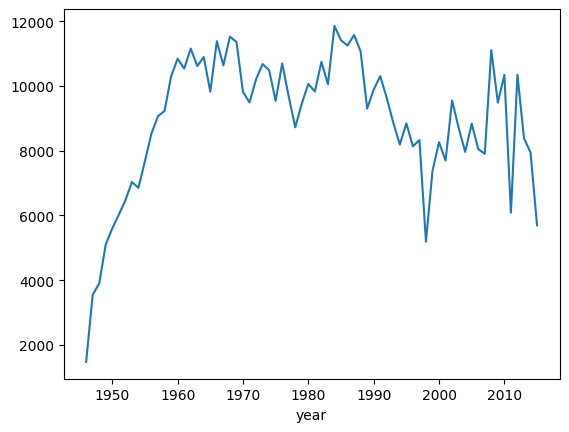

In [144]:
df_bos_pts_yearly.plot()